# Python-Data-Mining [3주차] 
## 3장. 시각화

### 1. 데이터 시각화 
> 데이터 시각화 
- 예측 분석 관련 데이터 시각화 
- 본격적인 분석 전에 수행하는 데이터 탐색에서 시각적 탐색에는 데이터 구조 이해, 데이터 수정(예상치 못한 격차 오류 또는 값 식별), 이상치 식별, 기본 패턴 발견(변수 간의 상관관계, 클러스터), 흥미로운 질문을 도출하기 위한 자유형 탐색 방법이 있음
- 매우 기초적인 차트를 만드는 것부터 필터링하거나 확대하는 작업을 사용하여 서로 연결된 차트 탐색에 이르기까지 아주 폭넓음

> 기본 차트: 막대그래프, 선그래프, 산점도
- 선그래프 
    - 주로 시계열을 보여주는데 사용함(ex. 주가, 환율 등)
    - 그래프를 그리기 위한 시간 프레임의 크기는 시간 척도와 마찬가지로 예측 작업의 규모와 데이터의 속성에 따라 달라짐

- 막대 그래프 
    -평균, 개수, 비율과 같은 단일 통계값의 그룹별 비교에 유용함
    - 막대 높이는 통계값을 나타내고, 각 막대는 그룹을 표시하며, 각 막대의 높이는 변수값을 나타냄

- 산점도
    - 수치형 변수간의 관계를 보여주는데 사용함
    - 비지도 학습에서 두가지 수치형 변수 간의 정보 중복이나 군집 발견과 같은 연관성을 밝히는데 도움이 됨

> 분포도: 박스 플롯과 히스토그램
- 분포도
    - 수치형 변수의 전반적인 분포를 표시 
    - 데이터 마이닝 방법과 변수 변환을 결정하기 위한 지도 학습에 유용함

- 박스 플롯
    - 나란히 생성해 하위 그룹끼리 비교하거나, 여러개의 박스 플롯을 시간 별로 생성함으로써 시간 변화에 따른 분포를 관찰할 수 있음

- 히스토그램
    - 일련의 수직 연결된 막대로 모든 x값의 빈도를 나타냄


> 히트맵: 상관관계와 결측치 시각화 
- 히트맵이란? : 수치형 데이터를 그래픽으로 나타내는 차트이며, 값을 색상으로 표시함
    - 상관 관계표의 시각화와 결측치의 시각화에 특히 유용함
    - p개의 변수에 대한 상관 관계표는 p행*p열이고 값보다는 색상을 살펴보는 것이 더 쉽고 빠르다
    - 큰 숫자 값을 검토하는데 유용하지만, 색상차이를 정확하게 인지하기 어려워 막대 그래프와 같은 정확한 그래픽 시각화를 대체하지는 못함


In [56]:
# 패키지 설치 
import os
import calendar
import numpy as np
import pandas as pd
import networkx as nx
from pandas.plotting import scatter_matrix,parallel_coordinates
import seaborn as sns   #면적차트, 시각화 도구
from sklearn import preprocessing
import matplotlib.pylab as plt  #기본 그래프 활용 - 선, 막대, 산점도
import dmba 
%matplotlib inline

### 예제1. 보스턴 주택 데이터 

In [57]:
# 보스턴 주택 데이터 불러오기 
housing_df = pd.read_csv('/Users/shimyuna/Desktop/✳︎/Python-Data-Mining/datamining/BostonHousing.csv')
## housing_df = dmba.load_data('/Users/shimyuna/Desktop/✳︎/Python-Data-Mining/datamining/WestRoxbury.csv')와 동일함 

# 보스턴 주택 데이터 컬럼 값들 확인하고, 앞에 5개의 데이터만 뽑아서 데이터 형식 및 컬럼 확인
print(housing_df.columns)
housing_df.head(5)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT_MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


### [기본 차트] (2)산점도 그리기

<function matplotlib.pyplot.show(close=None, block=None)>

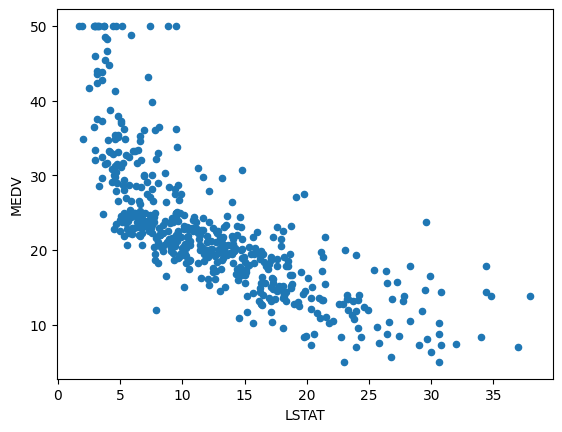

In [58]:
#  산점도 그래프 그리기
housing_df.plot.scatter( x='LSTAT', y='MEDV', legend =False )
plt.show

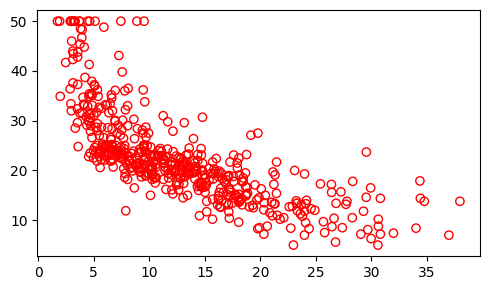

In [59]:
# 산점도 표현 응용 
## 점의 색상 설정, 열린 원으로 그리고자 
fig, ax = plt.subplots()
fig.set_size_inches(5,3)

ax.scatter(housing_df.LSTAT, housing_df.MEDV, color ='red', facecolor ='None') # x축은 저소득층 비율, y축은 주택 가격의 중앙값

plt.tight_layout() # 최소한의 여백을 만들어주어, subplot들이 겹치지 않도록 함
plt.show()

### [기본차트] (3)막대그래프 그리기

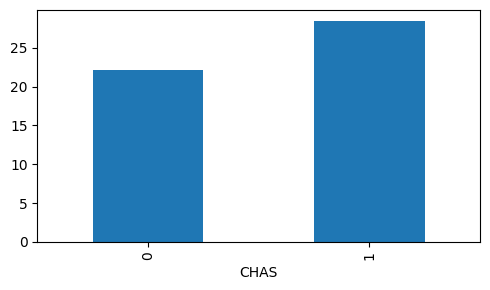

In [60]:
# 막대그래프 그리기 
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar', figsize=[5,3])
#찰스강 인접 여부에따라 housing_df 데이터를 그룹화 하고, 
        #### 이부분 무슨 뜻일까? .mean().MEDV.
plt.tight_layout()
plt.show()

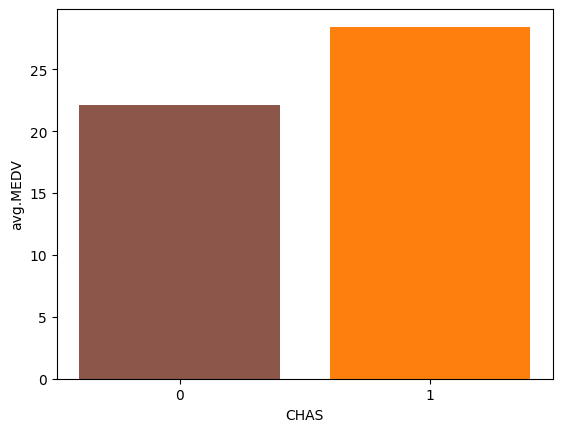

In [61]:
#
# fig, ax 변수에 대한 설명 https://m.blog.naver.com/allieverwanted/222146678032

dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()

ax.bar(dataForPlot.index, dataForPlot, color=['C5','C1'])
ax.set_xticks([0,1])   # x축의 눈금 이름 설정
ax.set_xlabel('CHAS') # x축 이름 설정
ax.set_ylabel('avg.MEDV')

plt.show()

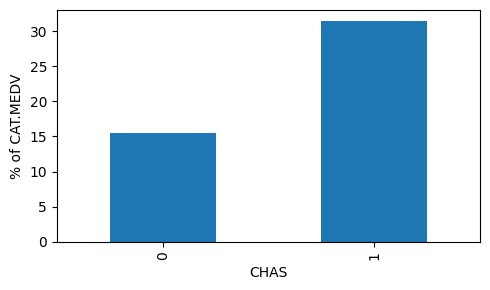

In [62]:
# 강의 인접에 따른 집값 평균을 구하는 코드

dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV']*100  # 주택가격이 3만달러 이상인지 여부 
ax = dataForPlot.plot(kind='bar', figsize=[5,3])
ax.set_ylabel('% of CAT.MEDV')

plt.tight_layout()
plt.show()

Text(0, 0.5, '% of CAT.MEDV')

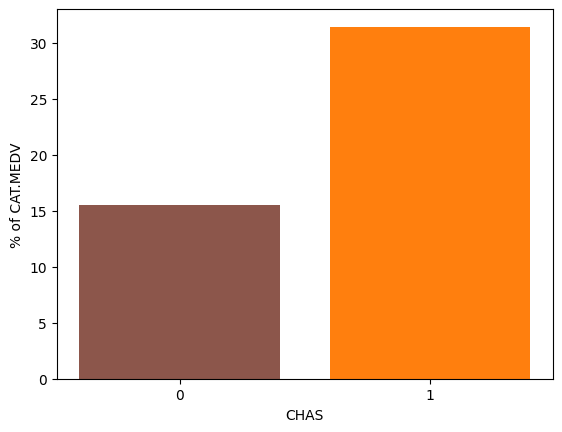

In [63]:
####### 이거 정확히 무엇을 말하는 내용인지 논의해보기 
# fig, ax 변수에 대한 설명 https://m.blog.naver.com/allieverwanted/222146678032

fig, ax = plt.subplots()

ax.bar(dataForPlot.index, dataForPlot, color=['C5','C1'])

ax.set_xticks([0,1])   # x축의 눈금 이름 설정
ax.set_xlabel('CHAS') # x축 이름 설정
ax.set_ylabel('% of CAT.MEDV')



### [분포도] 히스토그램

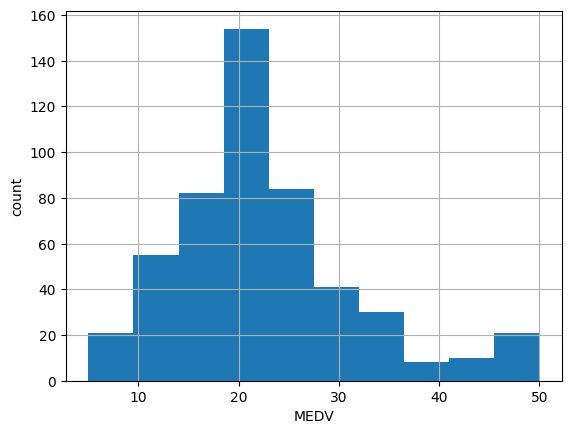

In [64]:
# MEDV(주택 가격의 중앙값)에 대한 히스토그램

ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

plt.show()

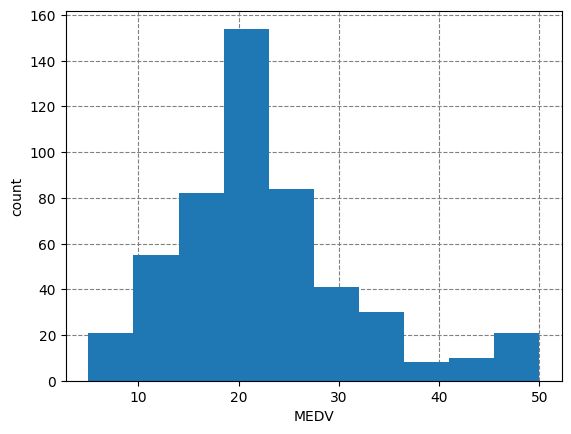

In [65]:
# 회색 기준선 그래프 뒤로 보내기
fig, ax = plt.subplots()

ax.hist(housing_df.MEDV)
ax.set_axisbelow(True)  #히스토그램 뒤에 격자선 표시
ax.grid(which='major', color='grey', linestyle='--')

ax.set_xlabel('MEDV')
ax.set_ylabel('count')

plt.show()

### [분포도] 박스 플롯

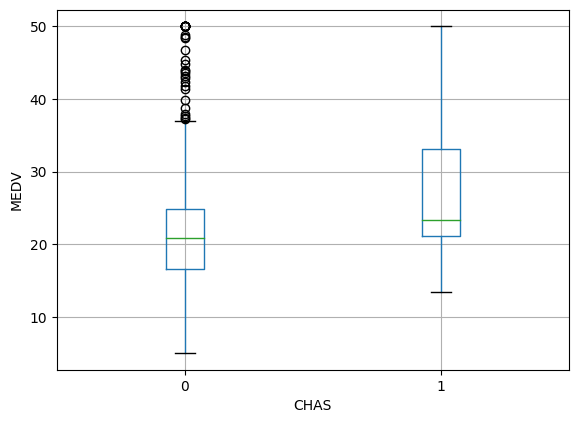

In [66]:
# CHAS(찰스강 인접 여부)별, MEDV(주택가격의 중앙값)의 박스 플롯
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')

plt.suptitle('')
plt.title('')

plt.show()

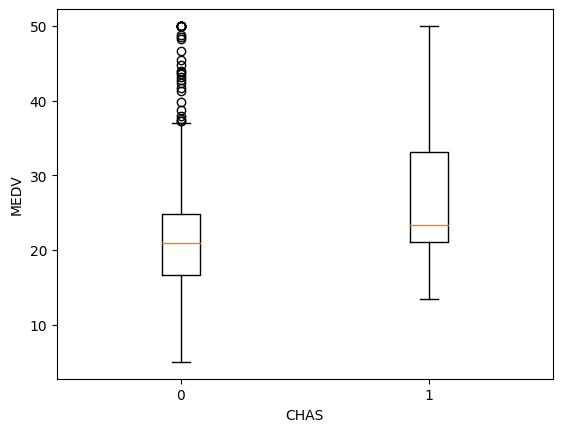

In [67]:
## 다른 방식으로 boxplot 구현하기

dataForPlot = [list(housing_df[housing_df.CHAS == 0].MEDV), list(housing_df[housing_df.CHAS ==1].MEDV)]
fig, ax  = plt.subplots()
ax.boxplot(dataForPlot)

ax.set_xticks([1,2])
ax.set_xticklabels([0,1])
ax.set_xlabel('CHAS')
ax.set_ylabel('MEDV')

plt.show()

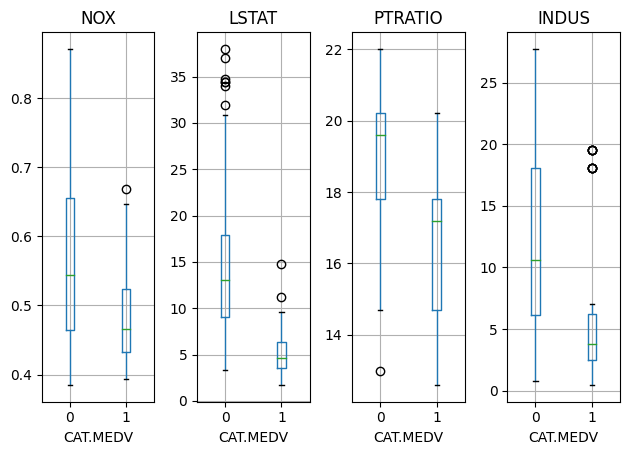

In [68]:
#====== 다양한 수치형 예측 변수로 결과 변수 CAT.MED를 탐색하기 위한 병렬 박스 플롯=====#
# 각 병렬 박스 플롯에서 한 축은 범주형 변수 사용. 다른 축은 수치형 변수를 사용
# 범주형 결과 변수와 수치형 예측 변수를 함께 그리고 예측 변수의 분포가 각 결과 범주마다 비교
# 수치형 결과 변수와 범주형 예측 변수를 함께 그리면 결과 변수의 분포가 예측 변수의 다양한 수준에 걸쳐 나타남
#======================================================================#

#CAT.MEDV 별 박스 플롯
fig, axes = plt.subplots(nrows=1, ncols=4) # 전체를 쪼갠다, 하나의 열과 4개의 컬럼으로 

housing_df.boxplot(column='NOX', by='CAT_MEDV', ax = axes[0]) # 박스플롯 결과 나오는 위치 배치 ax = axes[0]
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax = axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax = axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax = axes[3])

for ax in axes:
    ax.set_xlabel('CAT.MEDV')

plt.suptitle('')
plt.tight_layout()
 
plt.show()

### [히트맵]: 상관관계와 결측치 시각화

In [69]:
housing_df.corr()
# 상관 관계 분석 https://blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=221205309816

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.273687


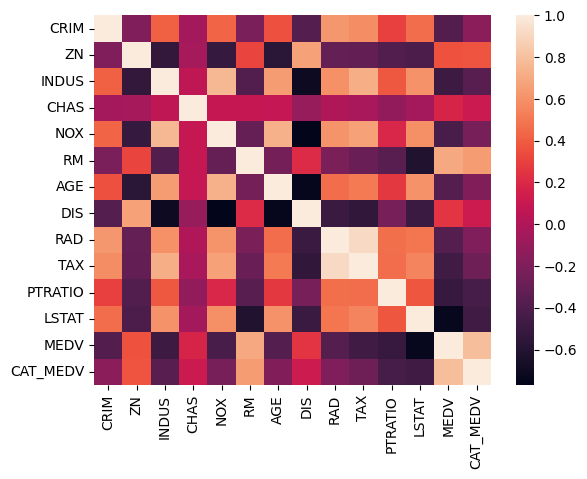

In [70]:
#==== 상관 관계에 대한 단순 히트맵 ====#
corr = housing_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

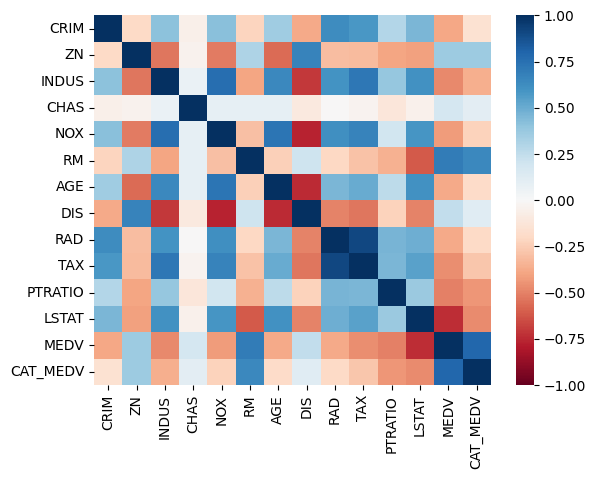

In [71]:
# 동일한 히트맵을 컬러맵을 divergent scale로 변경하고, 컬러맵의 범위를 고정
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

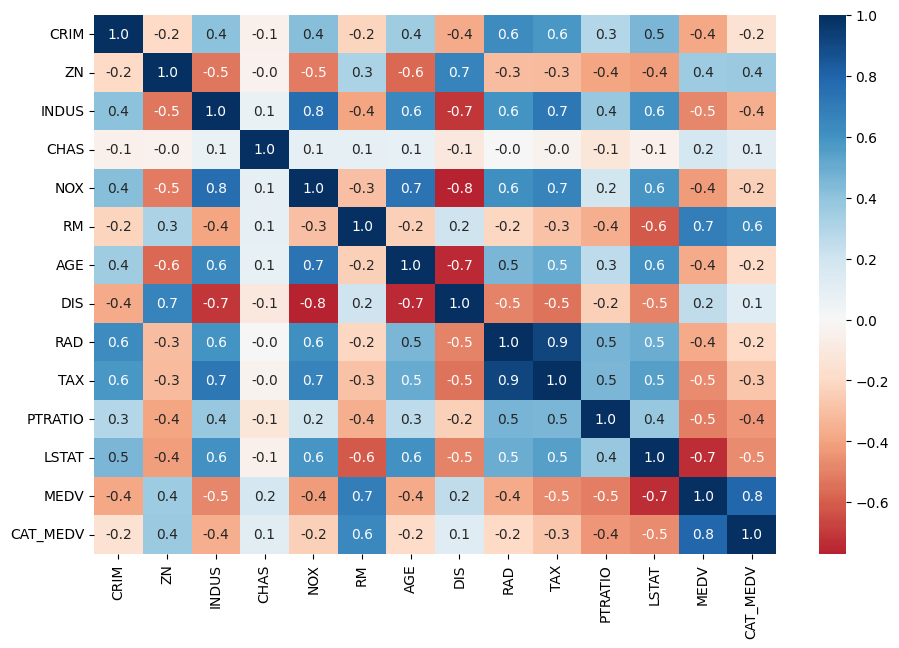

In [72]:
# 상관계수 값을 반영
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu",center=0, ax= ax) ## 이코드 뜻이 머임...
plt.show()

### 예제2. 엠트렉

In [73]:
Amtrak_df= pd.read_csv('/Users/shimyuna/Desktop/✳︎/Python-Data-Mining/datamining/Amtrak.csv')
print(Amtrak_df.columns) # Amtrak_df의 컬럼을 보여줘 
Amtrak_df.head(3)  #위 3 개까지만 보여줘 

Index(['Month', 'Ridership'], dtype='object')


,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715


In [74]:
# Amtrak 데이터를 로드하고, 시계열 분석에 적합하도록 변환
fig, axes = plt.subplots(nrows=4, ncols=1, figsize =(10,10))  #그래프 사이즈 설정 : figsize(가로길이,세로길이)

Amtrak_df = dmba.load_data('Amtrak.csv')    #dmba에서는 경로가 아니라 파일명을 입력함
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)

### [기본차트] (1)선그래프 그리기 with pandas, matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

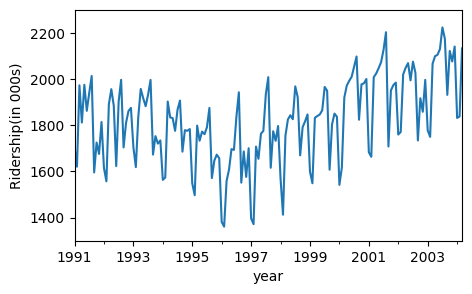

In [75]:
# [판다스]로 선그래프 그리기 
    # ylim,xlim 을 활용하여 x,y축의 범위 지정 가능 
    # legend 를 통해 범례 표시 
    # figsize(가로길이, 세로길이) 그래프의 사이즈 설정
ridership_ts.plot(ylim=[1300,2300], legend=False,figsize=[5,3])
plt.xlabel('year')
plt.ylabel('Ridership(in 000s)')

plt.tight_layout    # 최소한의 여백을 만들어주어, subplot들이 겹치지 않도록 함
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

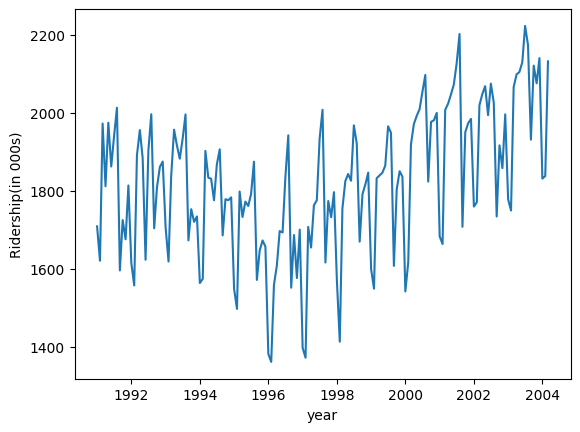

In [76]:
# [맷플롯립]으로 선그래프 그리기

plt.plot(ridership_ts.index, ridership_ts)  #ridership_ts.index를 통해, x축을 잡아주고, ridership_ts 값으로 y축을 자아줌
plt.xlabel('year')
plt.ylabel('Ridership(in 000s)')
plt.show

### 색상, 크기, 모양, 다중 패널, 애니메이션

> 색상
- 색상 코드는 수치 결과 변수(y축)과 수치 예측 변수 사이의 관계를 탐색하는데 도움을 줌
- 색상 ~ 코드화 된 산점도는 상호작용하는 조건을 만들 필요가 있는지 평가하는데 도움이 됨
- 범주 수가 적은 경우, 색상을 사용해 범주형 변수를 막대그래프에 추가. 범주 수가 많을때는 다중 패널 사용. 다중 패널에서는 범주형 변수에 따라 관측 데이터를 분리하고, 별도의 차트로 작성

> 산점도 매트릭스
- 다중 패널 산점도를 이용하는 특별한 차트
- 비지도 학습에서는 수치형 변수들 간의 연관성 분석, 아운라이어 탐지, 군집 식별등에 유용
- 지도 학습에서는 예측 변수들 간의 쌍별 관련성을 평가함으로써 변수 변환과 변수 선택 도움
- 예측 분야에서는 수치형 예측 변수와 결과 변수 간 관계를 서술하는데 쓰임

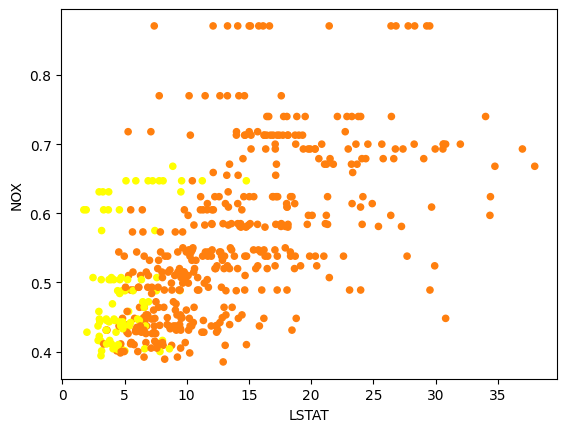

In [79]:
# CAT.MEDV의 값으로 포인트 색상을 정함
housing_df.plot.scatter(x='LSTAT', y= 'NOX' , 
                        c=['Yellow' if c == 1 
                                else 'C1' for c in housing_df.CAT_MEDV])

plt.show()

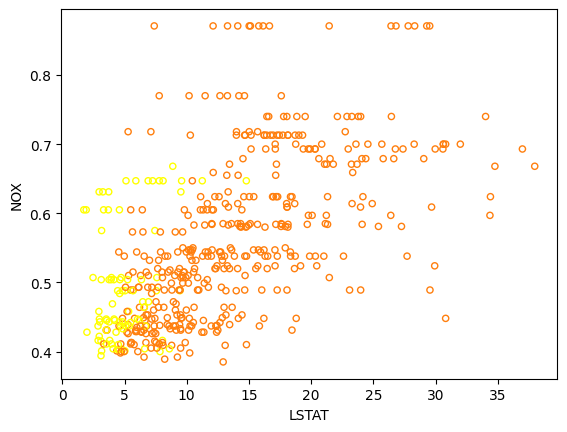

In [80]:
# 점의 렌더링을 열린 원으로 변경
housing_df.plot.scatter(x='LSTAT', y= 'NOX', color='none',
                        edgecolor=['Yellow' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])
plt.show()

## Jiter을 써서 뭉친 데이터를 처리할 수 있음


### 스케일링, 집계와 계층 구조

> 스케일링, 집계와 계층 구조
- 스케일, 집계, 계층을 달리하며 분석하면 다양한 수준의 패턴과 관계가 드러나고, 집중 분석해야 하는 새로운 변수군 발견 가능

> 스케일링
- 디스플레이의 축척을 변경하면 변수 간의 관계를 부각시킬 수 있음
- 밀집 현상을 해소하고, 2개의 로그 스케일 변수 간 선형 관계(로그-로그 관계)를 드러내줌

> 집계와 계층 구조
- 집계의 수준을 변경하는 스케일링
- 시계열 데이터에서 흔히 사용하는 집계 방법은 이동평균 -> moving ave.
- 비시간성 변수는 지리적 위치(보스턴 주택 예제의 우편번호별 주택), 조직도(부서 또는 부문의 인력) 등 의미 있는 계층이 있다면 집계 가능

### 확대/축소와 패닝, 필터링

> 확대/축소와 패닝
- 차트의 특정 영역을 확대 또는 축소, 확대/축소 윈도를 다른 이동 영역으로 이동(패닝)
- 확대/ 축소와 패닝을 통해 새로운 상호작용 조건, 새로운 변수, 데이터 서브셋에 관한 별도 모델을 만들어낼 수 있음

> 필터링
- 노이즈를 제거함으로써 특정 데이터에 관심을 집중하는 것

In [ ]:
### 확대/ 축소와 패닝, 필터링 실습
Amtrack_df = dmba.load_data('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format= '%d/%m/%Y')
Amtrak_df.set_index('Month',inplace=True)